In [1]:
import pandas as pd
import matplotlib.pyplot as plt

sov_ret = pd.read_csv("../eval_sovanta/eval-retrieval-meta--llama3.1-70b-instruct_context_relevance_with_cot.csv")
wik_ret = pd.read_csv("../eval_wikieval/eval-retrieval-gpt-4o_context_relevance_with_cot-2025-06-09_18_52_33.csv")

df_wikieval_ret = pd.read_csv("samples/wikieval-ret-sample-v2.csv")
df_sovanta_ret = pd.read_csv("samples/sovanta-ret-sample-v2.csv")

df_wikieval_legacy = pd.read_csv("samples/wikieval-legacy-sample.csv")
df_sovanta_legacy = pd.read_csv("samples/sovanta-legacy-sample.csv")

df_wikieval_ref_free = pd.read_csv("samples/wikieval-ref-free-sample.csv")
df_sovanta_ref_free = pd.read_csv("samples/sovanta-ref-free-sample.csv")

df_wikieval_rag_triad = pd.read_csv("samples/wikieval-rag-triad-sample.csv")
df_sovanta_rag_triad = pd.read_csv("samples/sovanta-rag-triad-sample.csv")

df_wikieval_ret_full = pd.read_csv("wikieval-ret.csv")
df_sovanta_ret_full = pd.read_csv("sovanta-ret.csv")

df_wikieval_legacy_full = pd.read_csv("wikieval-legacy.csv")
df_sovanta_legacy_full = pd.read_csv("sovanta-legacy.csv")

df_wikieval_ref_free_full = pd.read_csv("wikieval-ref-free.csv")
df_sovanta_ref_free_full = pd.read_csv("sovanta-ref-free.csv")

df_wikieval_rag_triad_full = pd.read_csv("wikieval-rag-triad.csv")
df_sovanta_rag_triad_full = pd.read_csv("sovanta-rag-triad.csv")

# 1. Retrieval
Wikieval

In [2]:
for llm in [
    "gpt-4o",
    "mistralai--mistral-large-instruct",
    "anthropic--claude-3.7-sonnet",
    "meta--llama3.1-70b-instruct",
]:
    print(
        f"{llm} Error Class Alignment:",
        (df_wikieval_ret["human_error_class"].astype(str) == df_wikieval_ret[f"{llm}_error_class"].astype(str)).mean(),
    )

gpt-4o Error Class Alignment: 0.6
mistralai--mistral-large-instruct Error Class Alignment: 0.6666666666666666
anthropic--claude-3.7-sonnet Error Class Alignment: 0.7333333333333333
meta--llama3.1-70b-instruct Error Class Alignment: 0.6


In [3]:
counts = df_wikieval_ret["anthropic--claude-3.7-sonnet_error_class"].value_counts()
print(counts)

anthropic--claude-3.7-sonnet_error_class
2    16
1    14
Name: count, dtype: int64


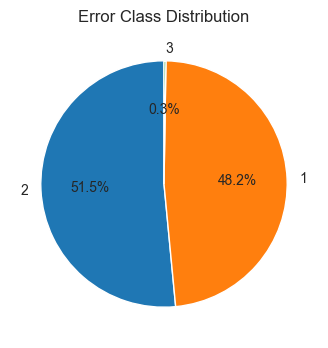

In [4]:
counts = df_wikieval_ret_full["anthropic--claude-3.7-sonnet_error_class"].value_counts()
counts.plot.pie(autopct="%1.1f%%", figsize=(4, 4), startangle=90)
plt.title("Error Class Distribution")
plt.ylabel("")  # Hide y-label
plt.show()

sovanta

In [5]:
for llm in ["mistralai--mistral-large-instruct", "meta--llama3.1-70b-instruct"]:
    print(
        f"{llm} Error Class Alignment:",
        (df_sovanta_ret["human_error_class"].astype(str) == df_sovanta_ret[f"{llm}_error_class"].astype(str)).mean(),
    )

mistralai--mistral-large-instruct Error Class Alignment: 0.7333333333333333
meta--llama3.1-70b-instruct Error Class Alignment: 0.7333333333333333


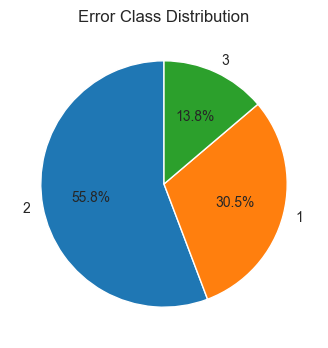

In [6]:
counts = df_sovanta_ret_full["mistralai--mistral-large-instruct_error_class"].value_counts()
counts.plot.pie(autopct="%1.1f%%", figsize=(4, 4), startangle=90)
plt.title("Error Class Distribution")
plt.ylabel("")  # Hide y-label
plt.show()

Both

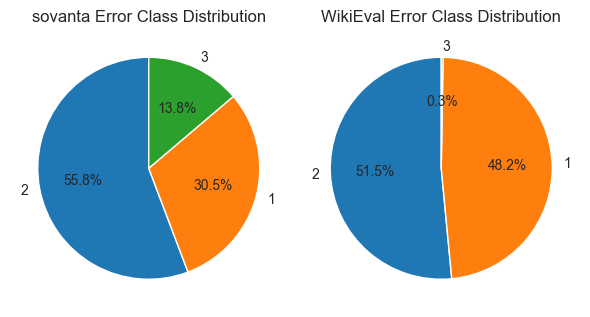

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(6, 5))

# First pie chart
counts1 = df_sovanta_ret_full["mistralai--mistral-large-instruct_error_class"].value_counts()
axs[0].pie(counts1, labels=counts1.index, autopct="%1.1f%%", startangle=90)
axs[0].set_title("sovanta Error Class Distribution")
axs[0].set_ylabel("")  # Hide y-label

# Second pie chart
counts2 = df_wikieval_ret_full["anthropic--claude-3.7-sonnet_error_class"].value_counts()
axs[1].pie(counts2, labels=counts2.index, autopct="%1.1f%%", startangle=90)
axs[1].set_title("WikiEval Error Class Distribution")
axs[1].set_ylabel("")  # Hide y-label

# Adjust layout
plt.tight_layout()
plt.show()

In [8]:
merged_sov_ret = pd.merge(
    sov_ret,
    df_sovanta_ret_full[
        [
            "prompt",
            "chunk_size",
            "top_k",
            "embed_model",
            "rerank_model",
            "mistralai--mistral-large-instruct_error_class",
        ]
    ],
    on=["prompt", "chunk_size", "top_k", "embed_model", "rerank_model"],
    how="left",
)
# merged_sov_ret = merged_sov_ret[merged_sov_ret['mistralai--mistral-large-instruct_error_class'] !=
merged_sov_ret.loc[
    merged_sov_ret["mistralai--mistral-large-instruct_error_class"] == 1,
    "nodes_recall_0.5",
] = 1
print(
    "sovanta Correlation without Error Class 1: ",
    merged_sov_ret["nodes_recall_0.5"].corr(merged_sov_ret["meta--llama3.1-70b-instruct_context_relevance_with_cot"]),
)

sovanta Correlation without Error Class 1:  0.3675848681455359


In [9]:
merged_wik_ret = pd.merge(
    wik_ret,
    df_wikieval_ret_full[
        [
            "prompt",
            "chunk_size",
            "top_k",
            "embed_model",
            "rerank_model",
            "anthropic--claude-3.7-sonnet_error_class",
        ]
    ],
    on=["prompt", "chunk_size", "top_k", "embed_model", "rerank_model"],
    how="left",
)
# merged_wik_ret = merged_wik_ret[merged_wik_ret['anthropic--claude-3.7-sonnet_error_class'] != 1]
merged_wik_ret.loc[merged_wik_ret["anthropic--claude-3.7-sonnet_error_class"] == 1, "nodes_recall_0.5"] = 1
print(
    "WikiEval Correlation without Error Class 1: ",
    merged_wik_ret["nodes_recall_0.5"].corr(merged_wik_ret["gpt-4o_context_relevance_with_cot"]),
)

WikiEval Correlation without Error Class 1:  0.524521210546754


# 2. Legacy Metrics

Wikieval

In [10]:
for llm in [
    "gpt-4o",
    "mistralai--mistral-large-instruct",
    "anthropic--claude-3.7-sonnet",
    "meta--llama3.1-70b-instruct",
]:
    print(
        f"{llm} Error Class Alignment:",
        (
            df_wikieval_legacy["human_error_class"].astype(str) == df_wikieval_legacy[f"{llm}_error_class"].astype(str)
        ).mean(),
    )

gpt-4o Error Class Alignment: 0.6333333333333333
mistralai--mistral-large-instruct Error Class Alignment: 0.6333333333333333
anthropic--claude-3.7-sonnet Error Class Alignment: 0.6
meta--llama3.1-70b-instruct Error Class Alignment: 0.6333333333333333


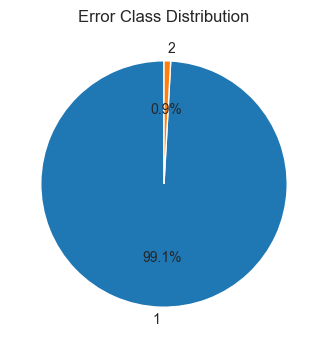

In [11]:
counts = df_wikieval_legacy_full["gpt-4o_error_class"].value_counts()
counts.plot.pie(autopct="%1.1f%%", figsize=(4, 4), startangle=90)
plt.title("Error Class Distribution")
plt.ylabel("")  # Hide y-label
plt.show()

sovanta

In [12]:
for llm in ["mistralai--mistral-large-instruct", "meta--llama3.1-70b-instruct"]:
    print(
        f"{llm} Error Class Alignment:",
        (
            df_sovanta_legacy["human_error_class"].astype(str) == df_sovanta_legacy[f"{llm}_error_class"].astype(str)
        ).mean(),
    )

mistralai--mistral-large-instruct Error Class Alignment: 0.6666666666666666
meta--llama3.1-70b-instruct Error Class Alignment: 0.6666666666666666


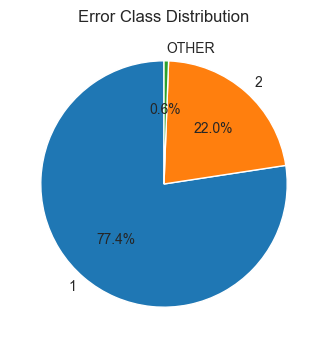

In [13]:
counts = df_sovanta_legacy_full["mistralai--mistral-large-instruct_error_class"].value_counts()
counts.plot.pie(autopct="%1.1f%%", figsize=(4, 4), startangle=90)
plt.title("Error Class Distribution")
plt.ylabel("")  # Hide y-label
plt.show()

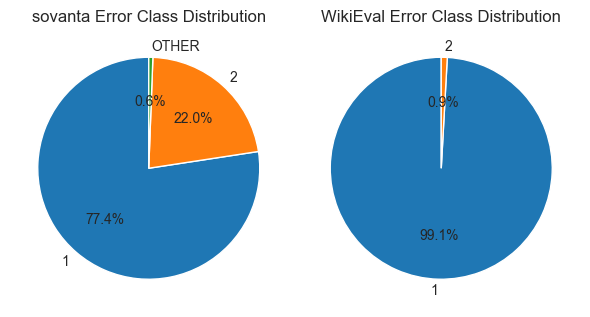

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(6, 5))

# First pie chart
counts1 = df_sovanta_legacy_full["mistralai--mistral-large-instruct_error_class"].value_counts()
axs[0].pie(counts1, labels=counts1.index, autopct="%1.1f%%", startangle=90)
axs[0].set_title("sovanta Error Class Distribution")
axs[0].set_ylabel("")  # Hide y-label

# Second pie chart
counts2 = df_wikieval_legacy_full["gpt-4o_error_class"].value_counts()
axs[1].pie(counts2, labels=counts2.index, autopct="%1.1f%%", startangle=90)
axs[1].set_title("WikiEval Error Class Distribution")
axs[1].set_ylabel("")  # Hide y-label

# Adjust layout
plt.tight_layout()
plt.show()

# 3. Reference-free judgement
Wikieval

In [15]:
for llm in [
    "gpt-4o",
    "mistralai--mistral-large-instruct",
    "anthropic--claude-3.7-sonnet",
    "meta--llama3.1-70b-instruct",
]:
    print(
        f"{llm} Error Class Alignment:",
        (
            df_wikieval_ref_free["human_error_class"].astype(str)
            == df_wikieval_ref_free[f"{llm}_error_class"].astype(str)
        ).mean(),
    )

gpt-4o Error Class Alignment: 0.6333333333333333
mistralai--mistral-large-instruct Error Class Alignment: 0.6333333333333333
anthropic--claude-3.7-sonnet Error Class Alignment: 0.16666666666666666
meta--llama3.1-70b-instruct Error Class Alignment: 0.03333333333333333


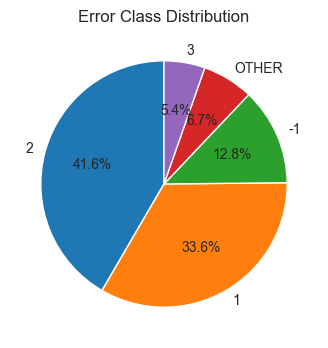

In [16]:
counts = df_wikieval_ref_free_full["gpt-4o_error_class"].value_counts()
counts.plot.pie(autopct="%1.1f%%", figsize=(4, 4), startangle=90)
plt.title("Error Class Distribution")
plt.ylabel("")  # Hide y-label
plt.show()

sovanta

In [17]:
for llm in ["mistralai--mistral-large-instruct", "meta--llama3.1-70b-instruct"]:
    print(
        f"{llm} Error Class Alignment:",
        (
            df_sovanta_ref_free["human_error_class"].astype(str)
            == df_sovanta_ref_free[f"{llm}_error_class"].astype(str)
        ).mean(),
    )

mistralai--mistral-large-instruct Error Class Alignment: 0.6333333333333333
meta--llama3.1-70b-instruct Error Class Alignment: 0.5333333333333333


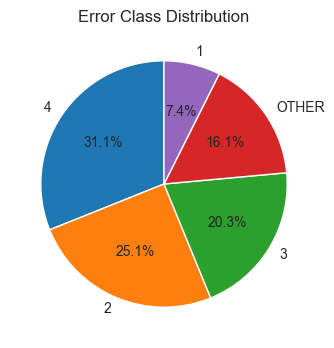

In [18]:
counts = df_sovanta_ref_free_full["mistralai--mistral-large-instruct_error_class"].value_counts()
counts.plot.pie(autopct="%1.1f%%", figsize=(4, 4), startangle=90)
plt.title("Error Class Distribution")
plt.ylabel("")  # Hide y-label
plt.show()

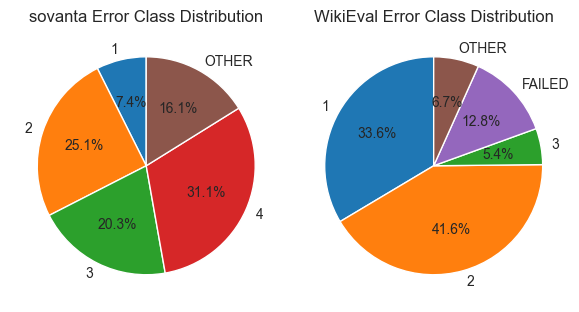

In [19]:
df_wikieval_ref_free_full["gpt-4o_error_class"] = df_wikieval_ref_free_full["gpt-4o_error_class"].replace(
    "-1", "FAILED"
)
labels1 = df_sovanta_ref_free_full["mistralai--mistral-large-instruct_error_class"].unique()
labels2 = df_wikieval_ref_free_full["gpt-4o_error_class"].unique()
all_labels = sorted(set(labels1) | set(labels2))  # Union of labels, sorted for consistency

# Create a color map using matplotlib's tab10 or any colormap
colors = plt.get_cmap("tab10").colors  # You can use a larger colormap if needed
color_map = {label: colors[i % len(colors)] for i, label in enumerate(all_labels)}

# Prepare figure
fig, axs = plt.subplots(1, 2, figsize=(6, 5))

# First pie chart
counts1 = df_sovanta_ref_free_full["mistralai--mistral-large-instruct_error_class"].value_counts().sort_index()
labels1 = counts1.index
colors1 = [color_map[label] for label in labels1]
axs[0].pie(counts1, labels=labels1, autopct="%1.1f%%", startangle=90, colors=colors1)
axs[0].set_title("sovanta Error Class Distribution")
axs[0].set_ylabel("")

# Second pie chart
counts2 = df_wikieval_ref_free_full["gpt-4o_error_class"].value_counts().sort_index()
labels2 = counts2.index
colors2 = [color_map[label] for label in labels2]
axs[1].pie(counts2, labels=labels2, autopct="%1.1f%%", startangle=90, colors=colors2)
axs[1].set_title("WikiEval Error Class Distribution")
axs[1].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

# 4. RAG Triad
Wikieval

In [20]:
for llm in [
    "gpt-4o",
    "mistralai--mistral-large-instruct",
    "anthropic--claude-3.7-sonnet",
    "meta--llama3.1-70b-instruct",
]:
    print(
        f"{llm} Error Class Alignment:",
        (
            df_wikieval_rag_triad["human_error_class"].astype(str)
            == df_wikieval_rag_triad[f"{llm}_error_class"].astype(str)
        ).mean(),
    )

gpt-4o Error Class Alignment: 0.9333333333333333
mistralai--mistral-large-instruct Error Class Alignment: 0.7666666666666667
anthropic--claude-3.7-sonnet Error Class Alignment: 0.9666666666666667
meta--llama3.1-70b-instruct Error Class Alignment: 0.8666666666666667


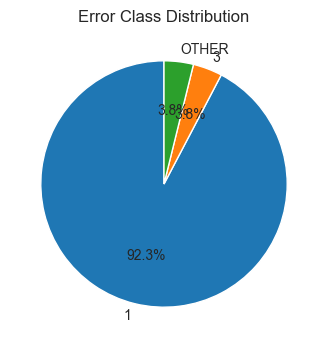

In [21]:
counts = df_wikieval_rag_triad_full["anthropic--claude-3.7-sonnet_error_class"].value_counts()
counts.plot.pie(autopct="%1.1f%%", figsize=(4, 4), startangle=90)
plt.title("Error Class Distribution")
plt.ylabel("")  # Hide y-label
plt.show()

sovanta

In [22]:
for llm in ["mistralai--mistral-large-instruct", "meta--llama3.1-70b-instruct"]:
    print(
        f"{llm} Error Class Alignment:",
        (
            df_sovanta_rag_triad["human_error_class"].astype(str)
            == df_sovanta_rag_triad[f"{llm}_error_class"].astype(str)
        ).mean(),
    )

mistralai--mistral-large-instruct Error Class Alignment: 0.6
meta--llama3.1-70b-instruct Error Class Alignment: 0.6


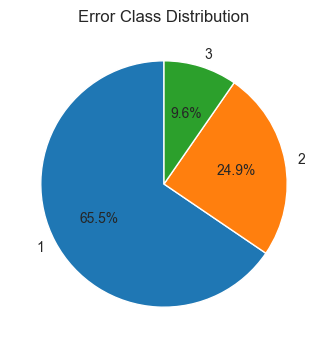

In [23]:
counts = df_sovanta_rag_triad_full["mistralai--mistral-large-instruct_error_class"].value_counts()
counts.plot.pie(autopct="%1.1f%%", figsize=(4, 4), startangle=90)
plt.title("Error Class Distribution")
plt.ylabel("")  # Hide y-label
plt.show()

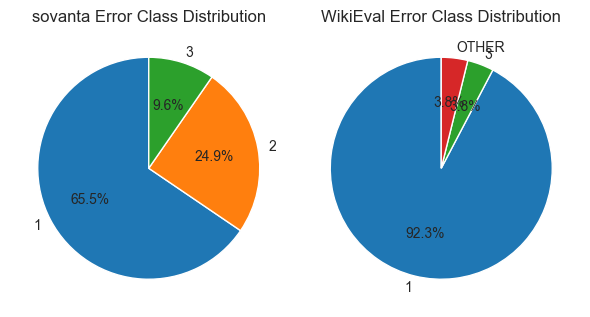

In [24]:
df_wikieval_rag_triad_full["anthropic--claude-3.7-sonnet_error_class"] = df_wikieval_rag_triad_full[
    "anthropic--claude-3.7-sonnet_error_class"
].apply(str)
df_sovanta_rag_triad_full["mistralai--mistral-large-instruct_error_class"] = df_sovanta_rag_triad_full[
    "mistralai--mistral-large-instruct_error_class"
].apply(str)
labels1 = df_sovanta_rag_triad_full["mistralai--mistral-large-instruct_error_class"].unique()
labels2 = df_wikieval_rag_triad_full["anthropic--claude-3.7-sonnet_error_class"].unique()
all_labels = sorted(set(labels1) | set(labels2))  # Union of labels, sorted for consistency

# Create a color map using matplotlib's tab10 or any colormap
colors = plt.get_cmap("tab10").colors  # You can use a larger colormap if needed
color_map = {label: colors[i % len(colors)] for i, label in enumerate(all_labels)}

# Prepare figure
fig, axs = plt.subplots(1, 2, figsize=(6, 5))

# First pie chart
counts1 = df_sovanta_rag_triad_full["mistralai--mistral-large-instruct_error_class"].value_counts().sort_index()
labels1 = counts1.index
colors1 = [color_map[label] for label in labels1]
axs[0].pie(counts1, labels=labels1, autopct="%1.1f%%", startangle=90, colors=colors1)
axs[0].set_title("sovanta Error Class Distribution")
axs[0].set_ylabel("")

# Second pie chart
counts2 = df_wikieval_rag_triad_full["anthropic--claude-3.7-sonnet_error_class"].value_counts().sort_index()
labels2 = counts2.index
colors2 = [color_map[label] for label in labels2]
axs[1].pie(counts2, labels=labels2, autopct="%1.1f%%", startangle=90, colors=colors2)
axs[1].set_title("WikiEval Error Class Distribution")
axs[1].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()